# **Objective**

WAP to implement a three-layer neural network using Tensor flow library (only, no keras) to classify MNIST handwritten digits dataset. Demonstrate the implementation of feed-forward and back-propagation approaches.

# **Description of the Model:**

This is a three-layer neural network implemented using TensorFlow (without Keras) for classifying handwritten digits from the MNIST dataset.

The model consists of:

Input Layer (784 neurons): Accepts flattened 28x28 pixel images.
Hidden Layer 1 (128 neurons): Uses ReLU activation to learn non-linear features.
Hidden Layer 2 (64 neurons): Uses ReLU activation for deeper representation.
Output Layer (10 neurons): Uses softmax activation to classify digits (0-9).
Loss Function: Categorical cross-entropy.
Optimizer: Adam Optimizer.
Training: Mini-batch Gradient Descent with batch size = 64.

# **Python Implementation**

Epoch 1, Loss: 0.3117, Accuracy: 91.11%
Epoch 2, Loss: 0.1282, Accuracy: 96.22%
Epoch 3, Loss: 0.0859, Accuracy: 97.47%
Epoch 4, Loss: 0.0631, Accuracy: 98.29%
Epoch 5, Loss: 0.0478, Accuracy: 98.75%
Epoch 6, Loss: 0.0358, Accuracy: 99.11%
Epoch 7, Loss: 0.0269, Accuracy: 99.34%
Epoch 8, Loss: 0.0226, Accuracy: 99.41%
Epoch 9, Loss: 0.0220, Accuracy: 99.38%
Epoch 10, Loss: 0.0176, Accuracy: 99.52%

Test Accuracy: 97.40%


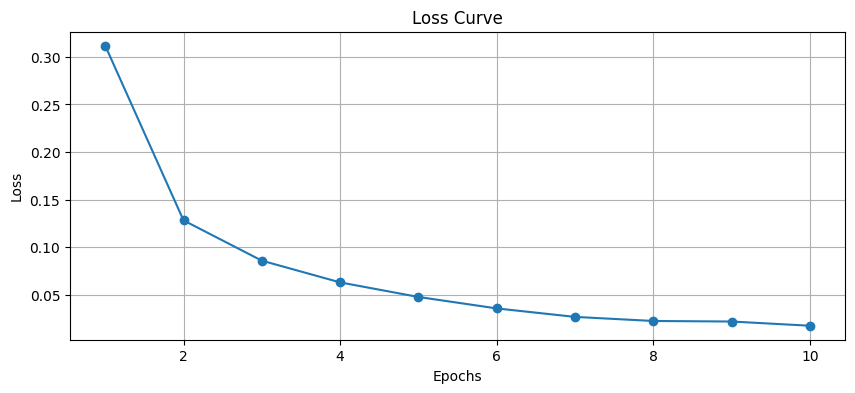

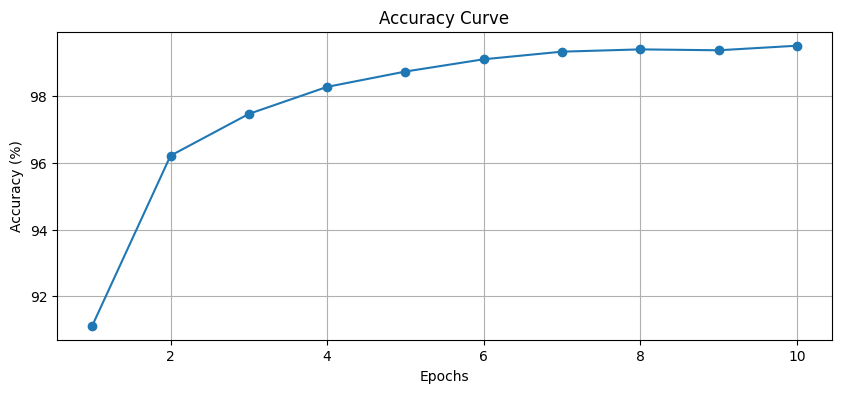

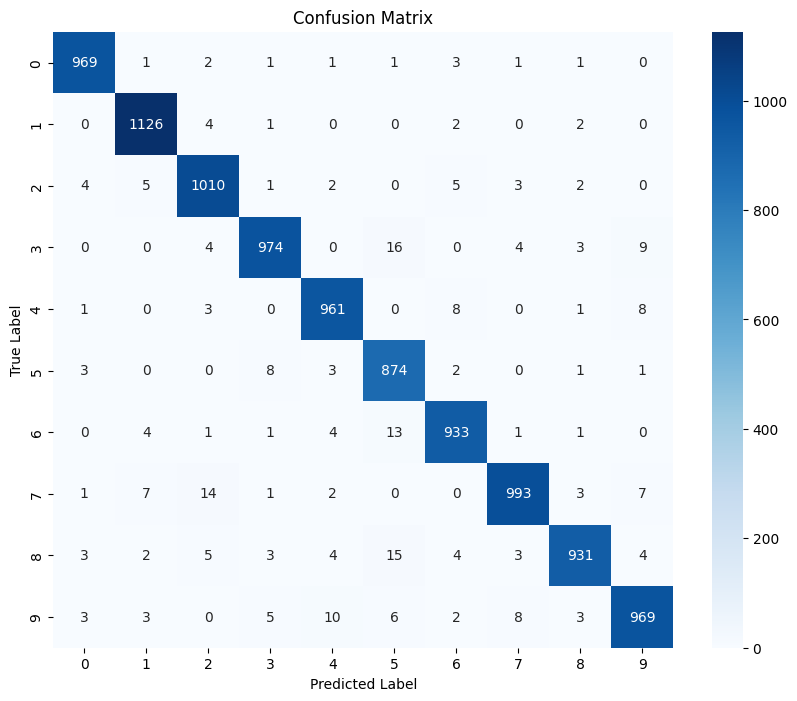

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Disable eager execution
tf.compat.v1.disable_eager_execution()

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape input data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encoding for labels
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]

# Define placeholders
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

def init_weights(shape):
    return tf.Variable(tf.random.normal(shape, stddev=0.1))

# Initialize weights and biases
W1, b1 = init_weights([784, 128]), tf.Variable(tf.zeros([128]))
W2, b2 = init_weights([128, 64]), tf.Variable(tf.zeros([64]))
W3, b3 = init_weights([64, 10]), tf.Variable(tf.zeros([10]))

def forward_propagation(X):
    a1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    a2 = tf.nn.relu(tf.matmul(a1, W2) + b2)
    return tf.matmul(a2, W3) + b3

logits = forward_propagation(X)
y_pred = tf.nn.softmax(logits)

# Loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.compat.v1.train.AdamOptimizer().minimize(loss)

# Accuracy metric
correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Training
epochs = 10
batch_size = 64
loss_history = []
accuracy_history = []

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for epoch in range(epochs):
        epoch_loss, epoch_acc = 0, 0
        num_batches = x_train.shape[0] // batch_size

        for i in range(0, x_train.shape[0], batch_size):
            batch_x, batch_y = x_train[i:i+batch_size], y_train_onehot[i:i+batch_size]
            _, batch_loss, batch_acc = sess.run([optimizer, loss, accuracy], feed_dict={X: batch_x, Y: batch_y})
            epoch_loss += batch_loss
            epoch_acc += batch_acc

        epoch_loss /= num_batches
        epoch_acc = (epoch_acc / num_batches) * 100
        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_acc)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

    # Evaluate on test set
    test_acc = sess.run(accuracy, feed_dict={X: x_test, Y: y_test_onehot}) * 100
    print(f"\nTest Accuracy: {test_acc:.2f}%")

    # Confusion matrix
    y_pred_labels = sess.run(tf.argmax(y_pred, 1), feed_dict={X: x_test})
    cm = confusion_matrix(y_test, y_pred_labels)

# Plot loss curve
plt.figure(figsize=(10, 4))
plt.plot(range(1, epochs + 1), loss_history, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.grid()
plt.show()

# Plot accuracy curve
plt.figure(figsize=(10, 4))
plt.plot(range(1, epochs + 1), accuracy_history, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Curve')
plt.grid()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# **Description of the Code Preprocessing:**
 Images are flattened (28×28 → 784) and normalized (0-255 → 0-1). Labels are one-hot encoded.

Neural Network Architecture:

Input layer: 784 neurons (flattened image)

Hidden Layer 1: 128 neurons (sigmoid activation)

Hidden Layer 2: 64 neurons (sigmoid activation)

Output Layer: 10 neurons (softmax for classification)

Training Process:

Batch Size: 64
Epochs: 10
Loss Function: Softmax Cross-Entropy
Optimizer: Gradient Descent
The model is trained using mini-batch gradient descent
Performance Tracking: Loss and Accuracy are recorded and plotted.

# **My Comments:**